In [52]:
import pandas as pd
import numpy as np
import spacy

import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

from urllib.request import urlopen

# Q1

## Chess Transfers

For this question we are going to use the following dataset:

In [53]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
...,...,...,...,...,...
927,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
928,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
929,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
930,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


The data shows chess grand masters moving one chess federation to another chess federation.

1. Calculate the number of chess masters moved to each federation. You must obtain a pandas data frame with two columns: Federation name and the number of grand masters moved into that specific federation.
2. Sort the table (highest to the lowest.)
3. DIsplay the top 10 federations as a bar chart.
4. Construct a python dictionary where the keys are pairs of federations (A,B) and the values are number of times grand masters moved from federation A to federation B.
5. Filter the dictionary and retain only the pairs that appear 5 or more times.
6. Constuct a **directed** `networkx` graph from the keys of the dictionary you constructed in step 5.
7. Display the graph.

In [54]:
from collections import Counter

## Calculating the number of chess masters moved to each federation

In [55]:
number_of_moved =Counter(chess["Federation"])
number_of_moved

Counter({'USA': 89,
         'BIH': 32,
         'ESA': 2,
         'AUT': 29,
         'AUS': 23,
         'CAN': 44,
         'ITA': 14,
         'PAR': 4,
         'SUI': 25,
         'YUG': 8,
         'CHI': 3,
         'UKR': 15,
         'SVK': 5,
         'RUS': 36,
         'BUL': 6,
         'FRA': 34,
         'ESP': 41,
         'GER': 55,
         'JCI': 5,
         'ROM': 2,
         'MKD': 2,
         'HON': 2,
         'ENG': 19,
         'ISR': 9,
         'MAR': 3,
         'JAP': 2,
         'ECU': 6,
         'AND': 11,
         'PLE': 9,
         'ISL': 5,
         'CZE': 29,
         'BAN': 2,
         'ARM': 9,
         'GRE': 5,
         'LIE': 8,
         'JPN': 8,
         'BER': 2,
         'SLO': 3,
         'SWE': 12,
         'MEX': 2,
         'TUR': 31,
         'CRO': 32,
         'SRB': 17,
         'JOR': 2,
         'COL': 4,
         'SCO': 10,
         'EST': 2,
         'HUN': 1,
         'KOR': 7,
         'SEY': 2,
         'LUX': 3,
         'P

## Sorting the table

In [56]:
dfcreator = {"N":number_of_moved.keys(),"m":number_of_moved.values()}
df = pd.DataFrame(dfcreator)
df.sort_values("m",ascending = False)

,N,m
0,USA,89
17,GER,55
5,CAN,44
16,ESP,41
13,RUS,36
...,...,...
51,PUR,1
84,ARG,1
53,QAT,1
54,CYP,1


## Displaying the top 10 federations as a bar chart

<BarContainer object of 10 artists>

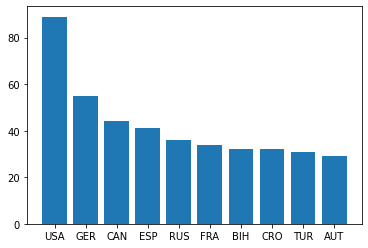

In [57]:
labels = df.sort_values("m",ascending = False).head(10)["N"]
values = df.sort_values("m",ascending = False).head(10)["m"]
plt.bar(labels,values)

## Creating pairs

In [58]:
pairs =Counter([(x,y) for x,y in zip(chess["Form.Fed"],chess["Federation"])])
pairs

Counter({('PHI', 'USA'): 6,
         ('CRO', 'BIH'): 8,
         ('YUG', 'BIH'): 2,
         ('HON', 'ESA'): 2,
         ('ISR', 'AUT'): 2,
         ('CAN', 'AUS'): 2,
         ('YUG', 'CAN'): 4,
         ('AZE', 'USA'): 3,
         ('ENG', 'CAN'): 2,
         ('GER', 'ITA'): 3,
         ('ESP', 'PAR'): 2,
         ('GEO', 'USA'): 4,
         ('GER', 'SUI'): 9,
         ('BEL', 'YUG'): 2,
         ('CRO', 'CHI'): 2,
         ('RUS', 'UKR'): 10,
         ('LBN', 'SVK'): 2,
         ('UZB', 'RUS'): 4,
         ('RUS', 'USA'): 7,
         ('AUT', 'SUI'): 2,
         ('ARM', 'USA'): 8,
         ('UKR', 'BUL'): 2,
         ('MNC', 'FRA'): 2,
         ('FRA', 'ESP'): 2,
         ('RUS', 'GER'): 16,
         ('CAN', 'YUG'): 4,
         ('ROM', 'ESP'): 2,
         ('ENG', 'JCI'): 2,
         ('CAN', 'ROM'): 2,
         ('BUL', 'MKD'): 2,
         ('ESP', 'HON'): 2,
         ('SVK', 'CAN'): 2,
         ('IRL', 'ENG'): 2,
         ('YUG', 'SVK'): 2,
         ('BIH', 'GER'): 4,
         ('USA', '

## Filtering the dictionary

In [59]:
f = {}
for i in pairs:
    if pairs[i] >5:
        f[i] = pairs[i]

f

{('PHI', 'USA'): 6,
 ('CRO', 'BIH'): 8,
 ('GER', 'SUI'): 9,
 ('RUS', 'UKR'): 10,
 ('RUS', 'USA'): 7,
 ('ARM', 'USA'): 8,
 ('RUS', 'GER'): 16,
 ('UKR', 'USA'): 7,
 ('ISR', 'CAN'): 7,
 ('CUB', 'USA'): 7,
 ('CUB', 'ESP'): 7,
 ('ESP', 'AND'): 7,
 ('RUS', 'CZE'): 8,
 ('UKR', 'GER'): 12,
 ('SCG', 'CRO'): 10,
 ('SVK', 'CZE'): 8,
 ('BIH', 'CRO'): 8,
 ('UKR', 'RUS'): 14,
 ('SRB', 'CRO'): 6,
 ('ENG', 'WLS'): 7,
 ('SRB', 'BIH'): 18,
 ('IND', 'USA'): 11,
 ('ROU', 'FRA'): 8,
 ('FRA', 'MNC'): 17,
 ('AZE', 'TUR'): 8,
 ('SYR', 'FIN'): 6}

## Creating and displaying the graph

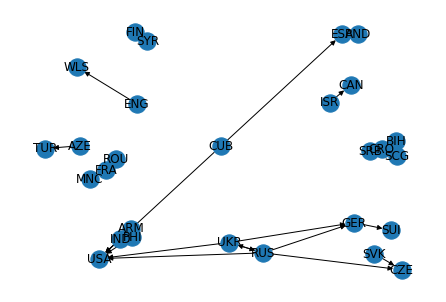

In [61]:
G = nx.DiGraph()
G.add_edges_from(f.keys())
nx.draw(G,with_labels=True)
plt.draw()
plt.show()

# Q2

## NBA Players

For this question we are going to use the following dataset:

In [5]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


The data contains play-by-play information about all games from the 2018-2019 NBA season. We are interested in the columns 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME'. If the specific entry involves two or more players PLAYER2_ID, PLAYER2_NAME, PLAYER3_ID, PLAYER3_NAME are going to be non-empty. 

1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 2 entries: A,B and A,C (write the pairs in the dictionary order).
2. Construct a python  dictionary where the keys are pairs of player names and the values are the number of times each pair appears in the list you constructed in step 1.
3. Filter the list and keep only the entries that appear more than 74 times (i.e. 75 or more).
4. Construct a `igraph` graph from the data you obtained from step 3.
5. Display the graph.
6. List the maximal cliques using the `maximal_cliques` of the graph data structure.

In [38]:
nba = NBA[[ 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME']]

## Creating the pairs

In [39]:
pairs = []
for i in range(len(nba)):
    if nba.iloc[i]["PLAYER1_ID"] != 0:
        if nba.iloc[i]["PLAYER2_ID"] != 0:
            first = nba.iloc[i]["PLAYER1_NAME"]
            second = nba.iloc[i]["PLAYER2_NAME"]
            temp = [first,second]
            pairs.append(temp)
        if nba.iloc[i]["PLAYER3_ID"] != 0:
            first = nba.iloc[i]["PLAYER1_NAME"]
            third = nba.iloc[i]["PLAYER3_NAME"]
            tempp = [first,third]
            pairs.append(tempp)
            

## Finding the number of times each pair appears.

In [46]:
number_of_pairs =Counter([(x,y) for x,y in pairs])
number_of_pairs

Counter({('Deandre Ayton', 'Kenneth Faried'): 1,
         ('Deandre Ayton', 'Elie Okobo'): 22,
         ('Josh Jackson', 'James Harden'): 6,
         ('Mikal Bridges', 'James Harden'): 8,
         ('James Harden', 'Devin Booker'): 1,
         ('Elie Okobo', 'James Ennis III'): 1,
         ('James Harden', 'Deandre Ayton'): 5,
         ('Kenneth Faried', 'Chris Paul'): 31,
         ('Elie Okobo', 'Chris Paul'): 3,
         ('Chris Paul', 'Elie Okobo'): 1,
         ('Kenneth Faried', 'Josh Jackson'): 3,
         ('Chris Paul', 'Josh Jackson'): 1,
         ('Josh Jackson', 'James Ennis III'): 1,
         ('James Harden', 'Chris Paul'): 98,
         ('Elie Okobo', 'Kelly Oubre Jr.'): 6,
         ('Kenneth Faried', 'Austin Rivers'): 14,
         ('Chris Paul', 'Nene'): 5,
         ('PJ Tucker', 'Austin Rivers'): 31,
         ('Nene', 'Devin Booker'): 1,
         ('James Ennis III', 'Gerald Green'): 22,
         ('Kelly Oubre Jr.', 'Josh Jackson'): 27,
         ('James Harden', 'Mikal Bridge

## Filtering the pairs

In [47]:
f = {}
for i in number_of_pairs:
    if number_of_pairs[i] >74:
        f[i] = number_of_pairs[i]
        
f

{('James Harden', 'Chris Paul'): 98,
 ('Richaun Holmes', 'Deandre Ayton'): 88,
 ('Deandre Ayton', 'Devin Booker'): 102,
 ('Deandre Ayton', 'Richaun Holmes'): 132,
 ('Donovan Mitchell', 'Joe Ingles'): 117,
 ('Derrick Favors', 'Jae Crowder'): 106,
 ('Rudy Gobert', 'Derrick Favors'): 144,
 ('Joe Ingles', "Royce O'Neale"): 99,
 ('Derrick Favors', 'Rudy Gobert'): 96,
 ("Royce O'Neale", 'Joe Ingles'): 100,
 ('DeAndre Jordan', 'Luka Doncic'): 83,
 ('Derrick Favors', 'Joe Ingles'): 115,
 ('Bryn Forbes', 'DeMar DeRozan'): 98,
 ('Bryn Forbes', 'Patty Mills'): 136,
 ('LaMarcus Aldridge', 'DeMar DeRozan'): 125,
 ('LaMarcus Aldridge', 'Jakob Poeltl'): 117,
 ('Derrick Favors', 'Ricky Rubio'): 79,
 ('Marco Belinelli', 'DeMar DeRozan'): 83,
 ('Rudy Gobert', 'Ricky Rubio'): 100,
 ('Klay Thompson', 'Kevin Durant'): 151,
 ('Josh Richardson', 'Dwyane Wade'): 126,
 ('Justise Winslow', 'Josh Richardson'): 76,
 ('Klay Thompson', 'Stephen Curry'): 104,
 ('Kevin Durant', 'Stephen Curry'): 83,
 ('Klay Thompson'

## Creating and displaying the graph

In [48]:
vertex = []
for i in f.keys():
    vertex.append(i[0])
    vertex.append(i[1])
vertex = list(set(vertex))

In [49]:
G = ig.Graph()
G.add_vertices(vertex)
G.add_edges(f.keys())
G.vs['label'] = vertex

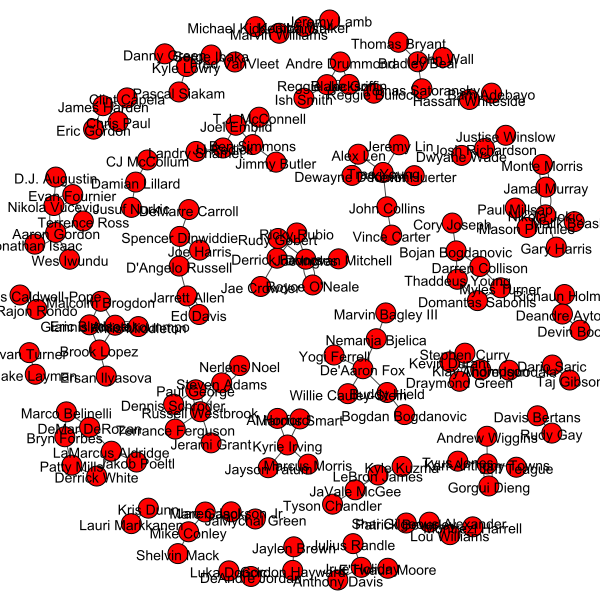

In [50]:
ig.plot(G)

## Finding maximal cliques

In [51]:
G.maximal_cliques()

[(151, 57),
 (31, 109),
 (31, 79),
 (32, 68),
 (36, 92),
 (38, 104),
 (39, 119),
 (40, 100),
 (43, 112),
 (44, 145),
 (45, 121),
 (45, 119),
 (46, 120),
 (51, 10),
 (52, 124),
 (52, 85),
 (52, 84),
 (54, 61),
 (55, 66),
 (57, 91),
 (57, 58),
 (66, 122),
 (67, 145),
 (68, 21),
 (70, 65),
 (71, 59),
 (72, 115),
 (73, 12),
 (76, 135),
 (80, 102),
 (82, 140),
 (83, 137),
 (83, 115),
 (83, 102),
 (83, 24),
 (87, 100),
 (89, 86),
 (93, 28),
 (94, 103),
 (95, 136),
 (97, 6),
 (98, 21),
 (98, 8),
 (99, 109),
 (104, 9),
 (116, 128),
 (118, 7),
 (122, 142),
 (124, 125),
 (127, 30),
 (130, 23),
 (132, 103),
 (134, 150),
 (143, 18),
 (144, 59),
 (147, 138),
 (149, 150),
 (150, 25),
 (0, 34),
 (3, 9),
 (11, 23),
 (15, 90),
 (20, 109),
 (22, 42),
 (27, 48),
 (29, 145),
 (103, 114, 131),
 (2, 6, 14),
 (2, 6, 129),
 (69, 146),
 (69, 96),
 (4, 133),
 (5, 77, 106),
 (5, 77, 123),
 (6, 133, 14),
 (138, 35, 113),
 (105, 74),
 (105, 37),
 (60, 49, 109),
 (146, 110),
 (62, 53, 107),
 (63, 1, 59),
 (64, 34),

# Q3

## Charles Dickens' *Great Expectations*

For this question we are going to use the following dataset:

In [20]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')

These are the names of the major characters in the novel:

In [21]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']


names

['Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

1. Split the text into sentences using a sentence tokenizer from your favorite NLP library.
2. Construct a list of pairs of names: a pair of names (A,B) appears in the list if and only if both A and B appears in the same sentence. When you store the pair (A,B) in the list make sure A appears before B in the alphabetical order.
3. Construct a python dictionary where the keys are pairs of names and values are the number of times each pair appears in the list you constructed in step 2.
4. Filter the list and retain only those pairs that appear more than twice (i.e. 3 or more).
5. Construct a `networkx` graph using the pairs you have from step 4.
6. Display the graph.

## Splitting the text

In [22]:
from nltk.tokenize import sent_tokenize

In [23]:
sentences = sent_tokenize(greatExpectations) 

## Constructing the pairs

### In this question, I used the following function to find the name pairs in the same sentence. Every time the pairs appear in the sentence, I add them to the list. Then I found the number of appearances of these pairs with the Counter function

In [62]:
pairs = []

for i in range(len(names)):
    a = names[i]
    for j in range(i+1,len(names)):
        b = names[j]
        for k in sentences:
            if (a and b) in k:
                namess = (a,b)
                n = sorted(namess)
                pairs.append(n) 
    

In [63]:
number_of_pairs =Counter([(x,y) for x,y in pairs])

In [64]:
number_of_pairs

Counter({('Joe', 'Pip'): 301,
         ('Joe', 'Wopsle'): 226,
         ('Hubble', 'Joe'): 19,
         ('Joe', 'Pumblechook'): 155,
         ('Joe', 'Richard'): 8,
         ('Biddy', 'Joe'): 193,
         ('Havisham', 'Joe'): 297,
         ('Joe', 'Joseph'): 33,
         ('Joe', 'Sarah'): 26,
         ('Estella', 'Joe'): 249,
         ('Joe', 'Orlick'): 106,
         ('Joe', 'Mike'): 11,
         ('Joe', 'Wemmick'): 253,
         ('Herbert', 'Joe'): 564,
         ('Joe', 'Pocket'): 130,
         ('Jane', 'Joe'): 13,
         ('Flopson', 'Joe'): 16,
         ('Coiler', 'Joe'): 6,
         ('Drummle', 'Joe'): 78,
         ('Jack', 'Joe'): 29,
         ('Joe', 'Spider'): 7,
         ('Handel', 'Joe'): 50,
         ('Clara', 'Joe'): 23,
         ('Joe', 'Skiffins'): 25,
         ('Joe', 'Magwitch'): 24,
         ('Joe', 'Provis'): 68,
         ('Compeyson', 'Joe'): 50,
         ('Joe', 'Tom'): 9,
         ('Bill', 'Joe'): 12,
         ('Barley', 'Joe'): 19,
         ('Joe', 'William'): 6,

## Filtering the pairs

In [65]:
d = {}
for i in number_of_pairs.keys():
    if number_of_pairs[i] > 2 :
        d[i] = number_of_pairs[i] 

## Creating and displaying the graph 

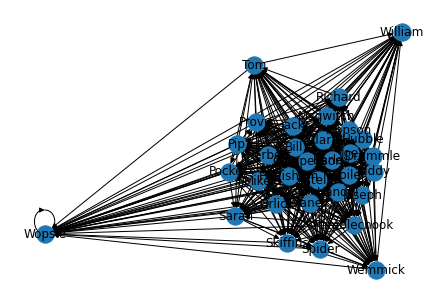

In [28]:
DİG = nx.DiGraph()
DİG.add_edges_from(d.keys())
nx.draw(DİG,with_labels=True)
plt.draw()
plt.show()